In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

In [2]:
# DATA

# import

file_path = os.path.join(r'D:\FMF magisterij\Matematika z računalnikom', f'test_weather_data.csv')
data = pd.read_csv(file_path)

data.head()


,index,time,airT,rainIntensity,rH,solarRadiance,windDir,windSpeed,pressure
0,1133,2020-11-05 12:15:00+00:00,10.9,0.0,76.4,111.4,233.0,1.13,99010.0
1,1134,2020-11-05 12:20:00+00:00,10.9,0.0,76.7,115.5,245.0,1.17,99010.0
2,1135,2020-11-05 12:25:00+00:00,11.0,0.0,75.5,117.2,243.0,1.64,99010.0
3,1136,2020-11-05 12:30:00+00:00,11.0,0.0,76.0,118.8,226.0,1.54,99000.0
4,1137,2020-11-05 12:35:00+00:00,11.0,0.0,74.2,120.4,221.0,1.90,99000.0


In [3]:
# rename columns to match the old format
new_data = data.rename(columns={
    'time': 'acquisition_timestamp',
    'airT': 'AMBIENT_TEMPERATURE',
    'rainIntensity': 'RAIN_INTENSITY',
    'rH': 'RELATIVE_HUMIDITY',
    'solarRadiance': 'SOLAR_RADIATION_INTENSITY',
    'windDir': 'WIND_DIRECTION',
    'windSpeed': 'WIND_SPEED',
    'pressure': 'AIR_PRESSURE'
})

# convert acquisition_timestamp to datetime
new_data['acquisition_timestamp'] = pd.to_datetime(new_data['acquisition_timestamp'], utc=True)

new_data = new_data.drop(columns=['index'])

# set the 'acquisition_timestamp' as the index
new_data = new_data.set_index('acquisition_timestamp')

# rearrange columns to match the old format
new_data = new_data[[
    'AIR_PRESSURE', 'AMBIENT_TEMPERATURE', 'RAIN_INTENSITY', 
    'RELATIVE_HUMIDITY', 'SOLAR_RADIATION_INTENSITY', 
    'WIND_DIRECTION', 'WIND_SPEED'
]]

new_data.head()


,AIR_PRESSURE,AMBIENT_TEMPERATURE,RAIN_INTENSITY,RELATIVE_HUMIDITY,SOLAR_RADIATION_INTENSITY,WIND_DIRECTION,WIND_SPEED
acquisition_timestamp,,,,,,,
2020-11-05 12:15:00+00:00,99010.0,10.9,0.0,76.4,111.4,233.0,1.13
2020-11-05 12:20:00+00:00,99010.0,10.9,0.0,76.7,115.5,245.0,1.17
2020-11-05 12:25:00+00:00,99010.0,11.0,0.0,75.5,117.2,243.0,1.64
2020-11-05 12:30:00+00:00,99000.0,11.0,0.0,76.0,118.8,226.0,1.54
2020-11-05 12:35:00+00:00,99000.0,11.0,0.0,74.2,120.4,221.0,1.90


In [4]:
# ambient wind_speed
wind_speed = new_data[['WIND_SPEED']]
print(wind_speed)

# count the NaN values
nan_count_wind_speed = wind_speed['WIND_SPEED'].isna().sum()
print(f'Nan Count Temperature :',nan_count_wind_speed)
# there are no NaN values

# check for missing measurements (skipped times)
complete_range = pd.date_range(start=wind_speed.index.min(), end=wind_speed.index.max(), freq='5T')
missing_timestamps = complete_range.difference(wind_speed.index)
print(f'Length of missing timestamps :',len(missing_timestamps))
#print(complete_range)
df_complete_range = pd.DataFrame(index=complete_range)
print(f'Data Complete Range :',len(df_complete_range))
# we have 271508 measurements, there are 5112 missing measurment out of 276620 time steps in the whole time range

# merge all the air pressure measurements with all the time steps. missing measurment will be NaN values for now
wind_speed_incomplete = df_complete_range.merge(wind_speed, left_index=True, right_index=True, how='left')
# print(wind_speed_incomplete)
wind_speed_incomplete.isna().sum() # okay

# missing measurements are filled with the next available measurement
wind_speed_all = wind_speed_incomplete.bfill()
print(f'Temperature all :',wind_speed_all)
print(f'Sum of na Tempertaure all :',wind_speed_all.isna().sum()) # okay

str(wind_speed_all.index.dtype) # okay

                           WIND_SPEED
acquisition_timestamp                
2020-11-05 12:15:00+00:00        1.13
2020-11-05 12:20:00+00:00        1.17
2020-11-05 12:25:00+00:00        1.64
2020-11-05 12:30:00+00:00        1.54
2020-11-05 12:35:00+00:00        1.90
...                               ...
2023-05-31 21:35:00+00:00        0.46
2023-05-31 21:40:00+00:00        0.39
2023-05-31 21:45:00+00:00        0.15
2023-05-31 21:50:00+00:00        0.32
2023-05-31 21:55:00+00:00        0.34

[265803 rows x 1 columns]
Nan Count Temperature : 4872
Length of missing timestamps : 4170
Data Complete Range : 269973
Temperature all :                            WIND_SPEED
2020-11-05 12:15:00+00:00        1.13
2020-11-05 12:20:00+00:00        1.17
2020-11-05 12:25:00+00:00        1.64
2020-11-05 12:30:00+00:00        1.54
2020-11-05 12:35:00+00:00        1.90
...                               ...
2023-05-31 21:35:00+00:00        0.46
2023-05-31 21:40:00+00:00        0.39
2023-05-31 21:45:00+00:00

'datetime64[ns, UTC]'

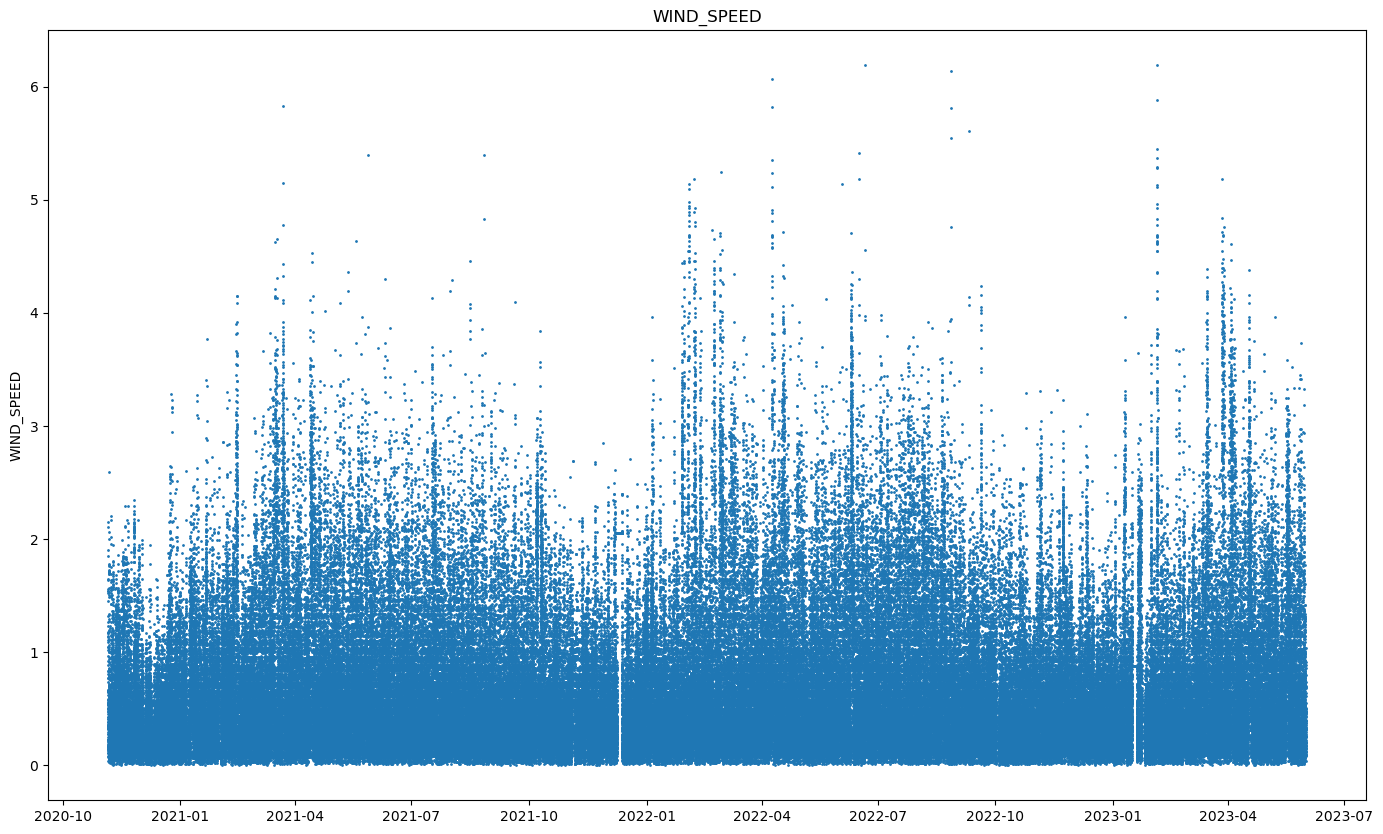

In [5]:
# plot 'AMMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(wind_speed_all.index, wind_speed_all['WIND_SPEED'],s=1)
ax.set_ylabel('WIND_SPEED')  
ax.set_title('WIND_SPEED')  
plt.show()

                           WIND_SPEED
2020-11-05 12:00:00+00:00    1.282222
2020-11-05 13:00:00+00:00    1.365833
2020-11-05 14:00:00+00:00    0.982500
2020-11-05 15:00:00+00:00    0.388333
2020-11-05 16:00:00+00:00    0.247500
...                               ...
2023-05-31 17:00:00+00:00    0.671667
2023-05-31 18:00:00+00:00    0.387500
2023-05-31 19:00:00+00:00    0.283333
2023-05-31 20:00:00+00:00    0.212500
2023-05-31 21:00:00+00:00    0.291667

[22498 rows x 1 columns]


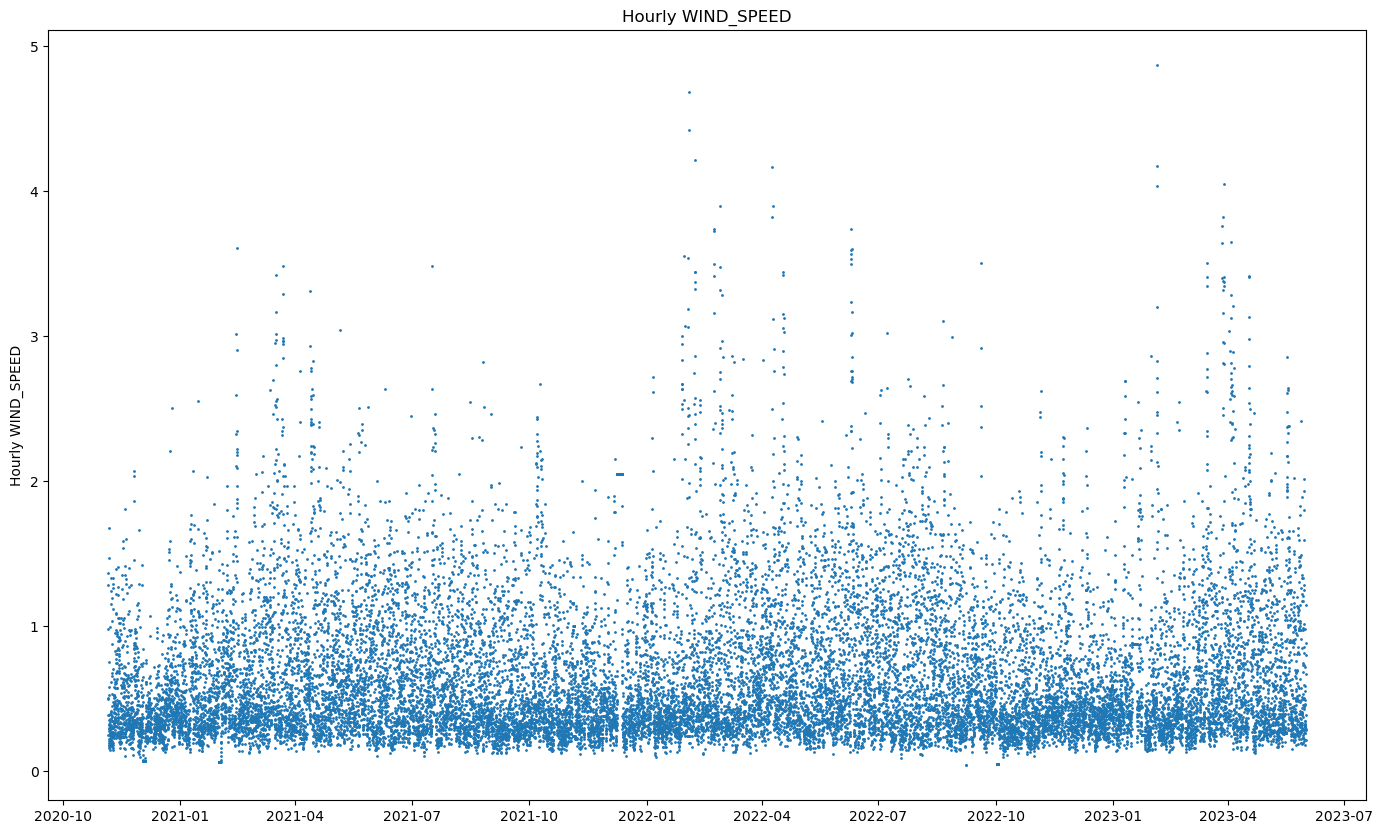

In [6]:
# hourly data
# sum the values for each hour and take the mean

str(wind_speed_all.index.dtype) # okay
wind_speed_hourly = wind_speed_all.resample('H').mean()
print(wind_speed_hourly)

# plot hourly 'AMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(wind_speed_hourly.index, wind_speed_hourly['WIND_SPEED'],s=1)
ax.set_ylabel('Hourly WIND_SPEED')  
ax.set_title('Hourly WIND_SPEED')  
plt.show()

In [7]:
# fit the old models to the new data 


from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Define both fits
order_1=(2,1,5)
order_2=(4,0,5)


                               SARIMAX Results                                
Dep. Variable:             WIND_SPEED   No. Observations:                22498
Model:                 ARIMA(2, 1, 5)   Log Likelihood               -4951.733
Date:                Wed, 22 May 2024   AIC                           9919.466
Time:                        03:52:07   BIC                           9983.635
Sample:                    11-05-2020   HQIC                          9940.341
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1546      0.421      0.367      0.713      -0.671       0.980
ar.L2          0.4608      0.325      1.419      0.156      -0.176       1.097
ma.L1         -0.3905      0.421     -0.928      0.3

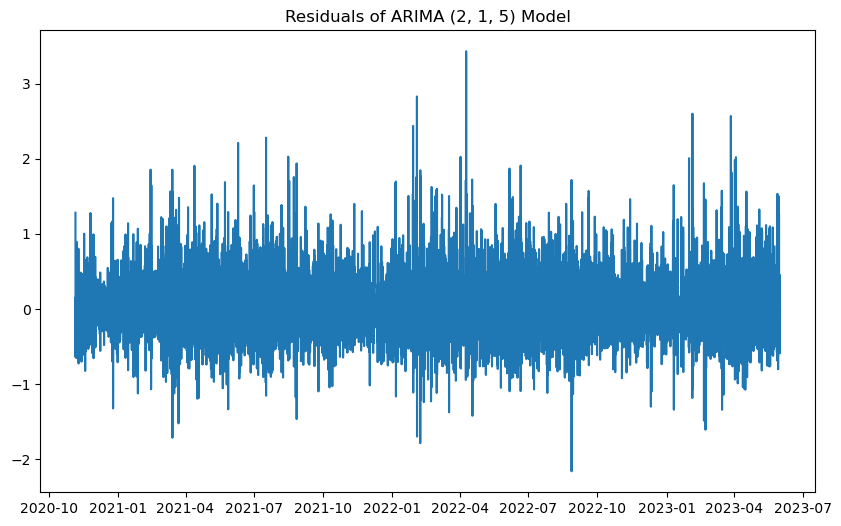

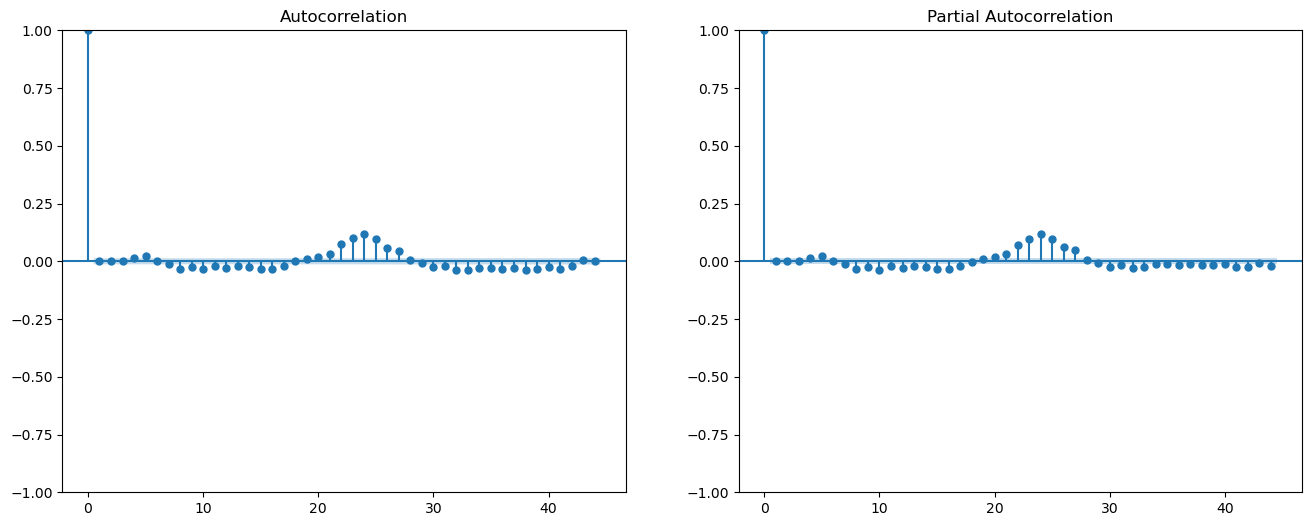

In [8]:

# fit the model number 1
best_model_1 = ARIMA(wind_speed_hourly, order=order_1)   # change order accordingly
best_fit_1 = best_model_1.fit()

# summary of the best model
print(best_fit_1.summary())

# residuals of the best model
residuals_best_1 = best_fit_1.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_1)
plt.title(f'Residuals of ARIMA {order_1} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_1, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_1, ax=ax[1], alpha=0.05)
plt.show()

In [9]:
# fit the model number 2
best_model_2 = ARIMA(wind_speed_hourly, order=order_2)   # change order accordingly
best_fit_2 = best_model_2.fit()

# summary of the best model
print(best_fit_2.summary())

# residuals of the best model
residuals_best_2 = best_fit_2.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_2)
plt.title(f'Residuals of ARIMA {order_2} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_2, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_2, ax=ax[1], alpha=0.05)
plt.show()

In [ ]:
# data for 2020, 2021, 2022
# fit the best model to this data
# 2 best ARIMAs: (2,1,5) and (4,0,5) - try both
# forecast the next 24 hours 
# compare forecast from ARIMA and simple model with actual values (maybe 2 simple models)
# plot forecasts, plot errors

wind_speed_20_21_22 = wind_speed_hourly.loc[(wind_speed_hourly.index.year == 2020) | (wind_speed_hourly.index.year == 2021) | (wind_speed_hourly.index.year == 2022) , 'WIND_SPEED']
print(wind_speed_20_21_22)

2020-11-05 12:00:00+00:00    1.282222
2020-11-05 13:00:00+00:00    1.365833
2020-11-05 14:00:00+00:00    0.982500
2020-11-05 15:00:00+00:00    0.388333
2020-11-05 16:00:00+00:00    0.247500
                               ...   
2022-12-31 19:00:00+00:00    0.328333
2022-12-31 20:00:00+00:00    0.339167
2022-12-31 21:00:00+00:00    0.255000
2022-12-31 22:00:00+00:00    0.286667
2022-12-31 23:00:00+00:00    0.369167
Freq: H, Name: WIND_SPEED, Length: 18876, dtype: float64


In [ ]:
# 1st simple model
# average of the previous 3 days is the value for the next day

def last_3_days_average(data, forecasted_steps):
    # Forecasts the next values based on the average of the last 3 days at the same time.
    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1) # finds out the next time step
        
        last_3_days = [
            next_time_step - pd.Timedelta(days=i) for i in range(1, 4)     # gets the same hour from the last 3 days
        ]
        
        values = [data[data.index == dt].values for dt in last_3_days] # extracts the values at the same hour from the last 3 days
        values = [val[0] if len(val) > 0 else np.nan for val in values]
        
        forecast_value = np.nanmean(values) # mean of the last 3 days
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])]) # adds the forecasted value to the data for the next iteration

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

last_3_days_average(wind_speed_20_21_22, 24)

last_3_wind_speed = last_3_days_average(wind_speed_20_21_22, 24)

In [ ]:
# 2nd simple model
# today's measurement is tomorrow's forecast

def today_is_tomorrow(data, forecasted_steps):

    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1)
        
        same_hour_last_day = next_time_step - pd.Timedelta(days=1)
        
        forecast_value = data.loc[same_hour_last_day]
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])])

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

today_is_tomorrow(wind_speed_20_21_22, 24)

today_is_tomorrow_wind_speed = today_is_tomorrow(wind_speed_20_21_22, 24)

ARIMA(4,0,5) is preferred based on AIC.

In [ ]:
# ARIMA(4,0,5) (2nd fit)

# change p,d,q to the best found

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# fit
model_405 = ARIMA(wind_speed_20_21_22, order=(4,0,5))
fit_405 = model_405.fit()

# summary of the fit
print(fit_405.summary())

# ARIMA forecast for 1 day (24 steps) into the future

forecast_result_405 = fit_405.get_forecast(steps=24)
forecast_values_405 = forecast_result_405.predicted_mean
conf_int_405 = forecast_result_405.conf_int()

print("Forecasted values:", forecast_values_405)
print("95% Confidence intervals of forecasts:", conf_int_405)


                               SARIMAX Results                                
Dep. Variable:             WIND_SPEED   No. Observations:                18876
Model:                 ARIMA(4, 0, 5)   Log Likelihood               -3395.506
Date:                Wed, 22 May 2024   AIC                           6813.012
Time:                        03:31:01   BIC                           6899.314
Sample:                    11-05-2020   HQIC                          6841.327
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6462      0.012     54.041      0.000       0.623       0.670
ar.L1          1.7330      0.006    291.472      0.000       1.721       1.745
ar.L2          0.1812      0.008     21.536      0.0

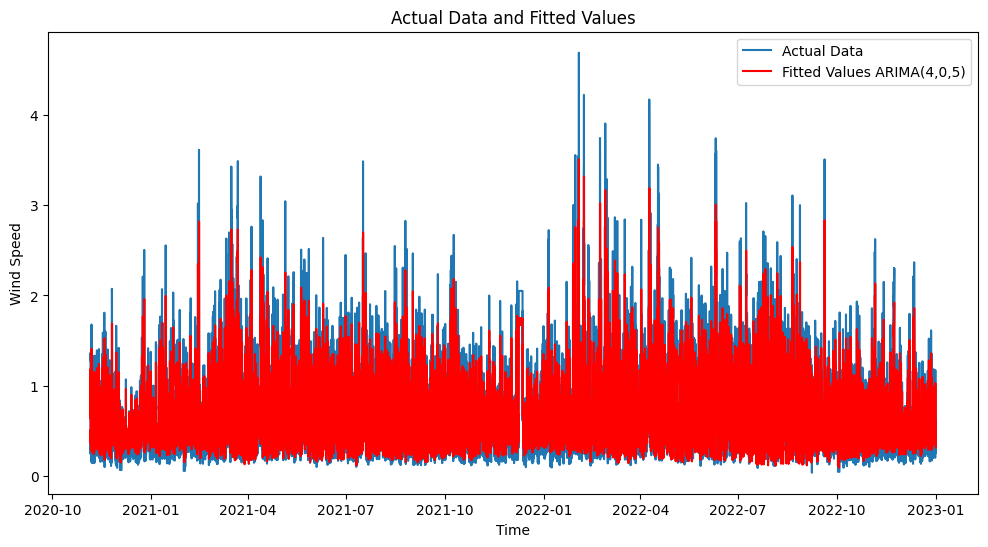

In [ ]:
# plot actual data and fitted values - 2ND ARIMA
# change p,d,q to the best found

# fitted values
fitted_values_405 = fit_405.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(wind_speed_20_21_22.index, wind_speed_20_21_22, label='Actual Data')
plt.plot(wind_speed_20_21_22.index, fitted_values_405, color='red', label='Fitted Values ARIMA(4,0,5)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.title('Actual Data and Fitted Values')
plt.show()

# this looks too good

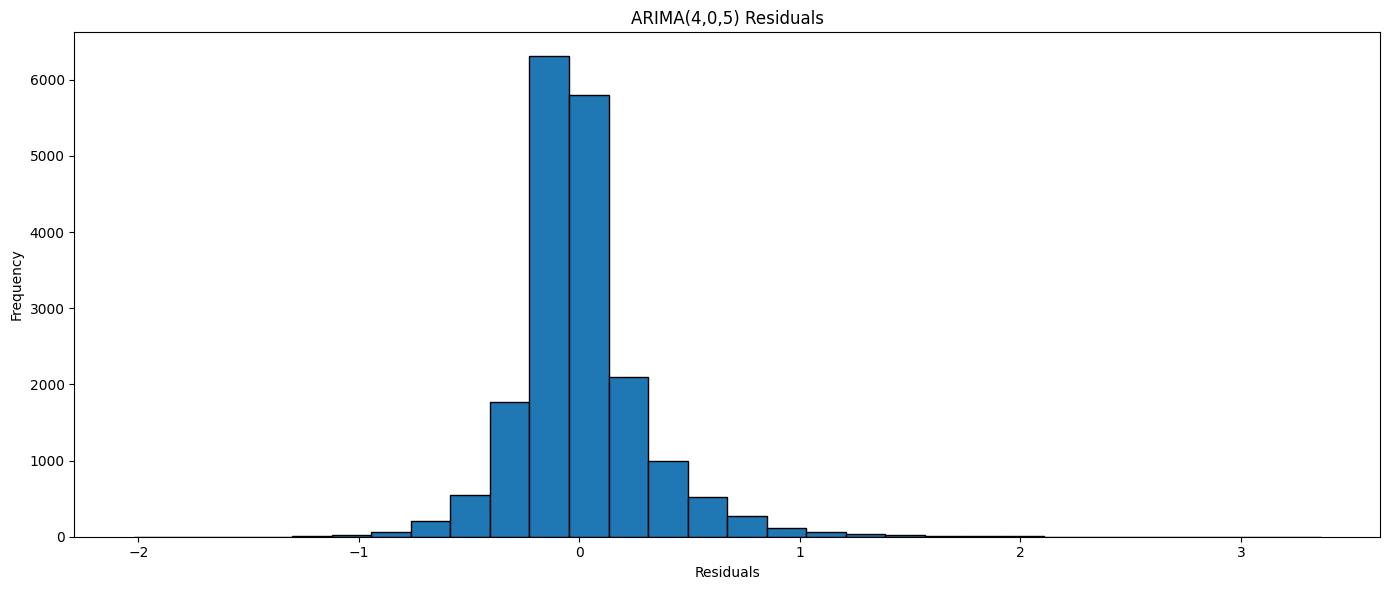

In [ ]:
# comparison of the histograms

# residuals

residuals_405 = fit_405.resid

plt.figure(figsize=(14, 6))
plt.hist(residuals_405, bins=30, edgecolor='k')
plt.title('ARIMA(4,0,5) Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

In [ ]:
# statistical test and metricts to determine which model is better

import math 
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# mean of the residuals (should be 0)

mean2 = np.mean(residuals_405)
#print(mean1, mean2)

# AIC (already done above) - writte about AIC in the report

aic2 = fit_405.aic
#print(aic1, aic2)


# Ljung-Box test for autocorrelation - see model fit output

# BIC - see model fit output

Mean Absolute Error: 0.19686011877484227
Mean Squared Error: 0.08390698263696318


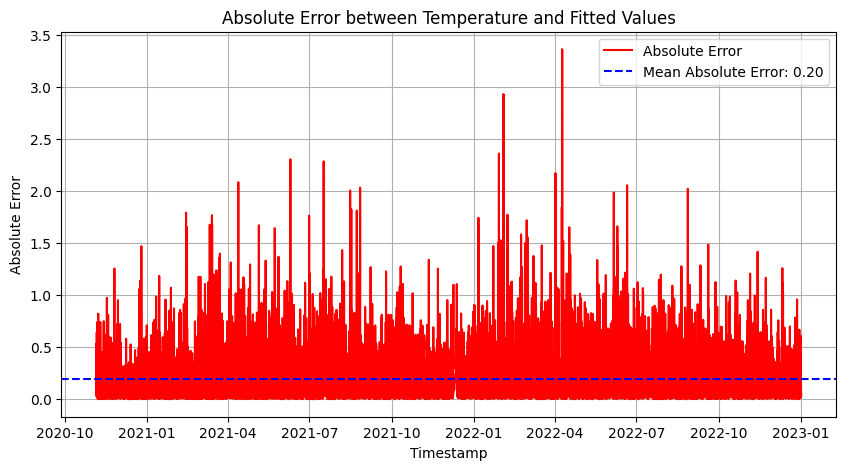

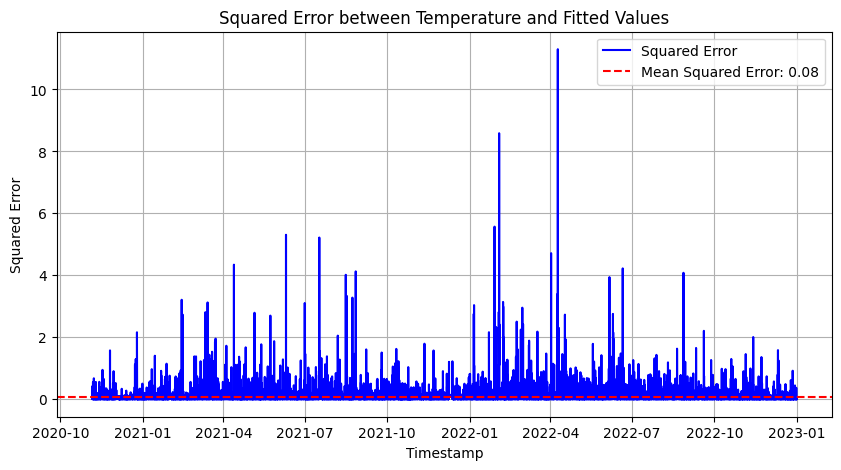

In [ ]:
# absolute error comparison - actual data vs fitted model data

def calculate_errors(data, model): 
      # model are fitted values of a chosen model
  if isinstance(data, pd.Series) and isinstance(model, pd.Series):
        absolute_error = (data - model).abs()
        squared_error = (data - model) ** 2
  elif isinstance(data, np.ndarray) and isinstance(model, np.ndarray):
        absolute_error = np.abs(data - model)
        squared_error = (data - model) ** 2
  errors = pd.DataFrame({
        'absolute_error': absolute_error,
        'squared_error': squared_error
  })

  return errors

# (4,1,2) is the preferred, lets compare this data with actual data
# actual data - temperature_20_21_22
# fitted values data - fitted_values_412 

errors = calculate_errors(wind_speed_20_21_22, fitted_values_405 )

# mean errors
mean_absolute_error = errors['absolute_error'].mean()
mean_squared_error = errors['squared_error'].mean()
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

# plot of the absolute error
plt.figure(figsize=(10, 5))
plt.plot(errors['absolute_error'], label='Absolute Error', color='red')
plt.axhline(y=mean_absolute_error, color='blue', linestyle='--', label=f'Mean Absolute Error: {mean_absolute_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Absolute Error')
plt.title('Absolute Error between Temperature and Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

# plot of the squared error
plt.figure(figsize=(10, 5))
plt.plot(errors['squared_error'], label='Squared Error', color='blue')
plt.axhline(y=mean_squared_error, color='red', linestyle='--', label=f'Mean Squared Error: {mean_squared_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Squared Error')
plt.title('Squared Error between Temperature and Fitted Values')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    

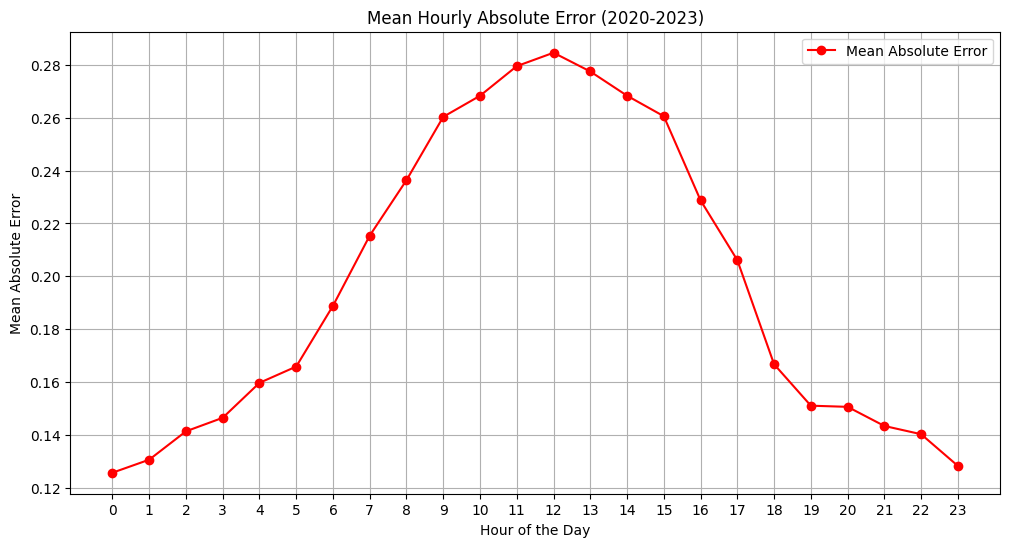

Hour
0     0.125699
1     0.130628
2     0.141362
3     0.146476
4     0.159696
5     0.165857
6     0.188850
7     0.215395
8     0.236381
9     0.260329
10    0.268295
11    0.279502
12    0.284579
13    0.277480
14    0.268320
15    0.260554
16    0.228737
17    0.206105
18    0.166730
19    0.151059
20    0.150621
21    0.143387
22    0.140266
23    0.128282
Name: absolute_error, dtype: float64


In [ ]:
# mean hourly absolute errors

errors['Hour'] = errors.index.hour

# mean
mean_absolute_errors_by_hour = errors.groupby('Hour')['absolute_error'].mean()

# plot
plt.figure(figsize=(12, 6))
plt.plot(mean_absolute_errors_by_hour.index, mean_absolute_errors_by_hour, label='Mean Absolute Error', marker='o', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Hourly Absolute Error (2020-2023)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(range(24))
plt.show()

print(mean_absolute_errors_by_hour)

In [ ]:
# actual measurements for 1 day (24 steps) into the future
w_speed_hourly = wind_speed_hourly['WIND_SPEED']
actual_values_wind_speed_23 = w_speed_hourly['2023'].head(24)
print(actual_values_wind_speed_23)

2023-01-01 00:00:00+00:00    0.185833
2023-01-01 01:00:00+00:00    0.430833
2023-01-01 02:00:00+00:00    0.370833
2023-01-01 03:00:00+00:00    0.354167
2023-01-01 04:00:00+00:00    0.411667
2023-01-01 05:00:00+00:00    0.447500
2023-01-01 06:00:00+00:00    0.514167
2023-01-01 07:00:00+00:00    0.410833
2023-01-01 08:00:00+00:00    0.424167
2023-01-01 09:00:00+00:00    0.897500
2023-01-01 10:00:00+00:00    1.055833
2023-01-01 11:00:00+00:00    0.839167
2023-01-01 12:00:00+00:00    0.621667
2023-01-01 13:00:00+00:00    0.745000
2023-01-01 14:00:00+00:00    0.235000
2023-01-01 15:00:00+00:00    0.669167
2023-01-01 16:00:00+00:00    0.412500
2023-01-01 17:00:00+00:00    0.545000
2023-01-01 18:00:00+00:00    0.310833
2023-01-01 19:00:00+00:00    0.424167
2023-01-01 20:00:00+00:00    0.323333
2023-01-01 21:00:00+00:00    0.490000
2023-01-01 22:00:00+00:00    0.252500
2023-01-01 23:00:00+00:00    0.558333
Freq: H, Name: WIND_SPEED, dtype: float64


                             Actual  ARIMA(4,0,5)  \
2023-01-01 00:00:00+00:00  0.185833      0.396042   
2023-01-01 01:00:00+00:00  0.430833      0.430893   
2023-01-01 02:00:00+00:00  0.370833      0.459000   
2023-01-01 03:00:00+00:00  0.354167      0.496921   
2023-01-01 04:00:00+00:00  0.411667      0.527263   
2023-01-01 05:00:00+00:00  0.447500      0.566870   
2023-01-01 06:00:00+00:00  0.514167      0.597483   
2023-01-01 07:00:00+00:00  0.410833      0.635186   
2023-01-01 08:00:00+00:00  0.424167      0.661400   
2023-01-01 09:00:00+00:00  0.897500      0.692007   
2023-01-01 10:00:00+00:00  1.055833      0.708649   
2023-01-01 11:00:00+00:00  0.839167      0.727516   
2023-01-01 12:00:00+00:00  0.621667      0.730911   
2023-01-01 13:00:00+00:00  0.745000      0.735677   
2023-01-01 14:00:00+00:00  0.235000      0.725015   
2023-01-01 15:00:00+00:00  0.669167      0.716537   
2023-01-01 16:00:00+00:00  0.412500      0.694336   
2023-01-01 17:00:00+00:00  0.545000      0.676

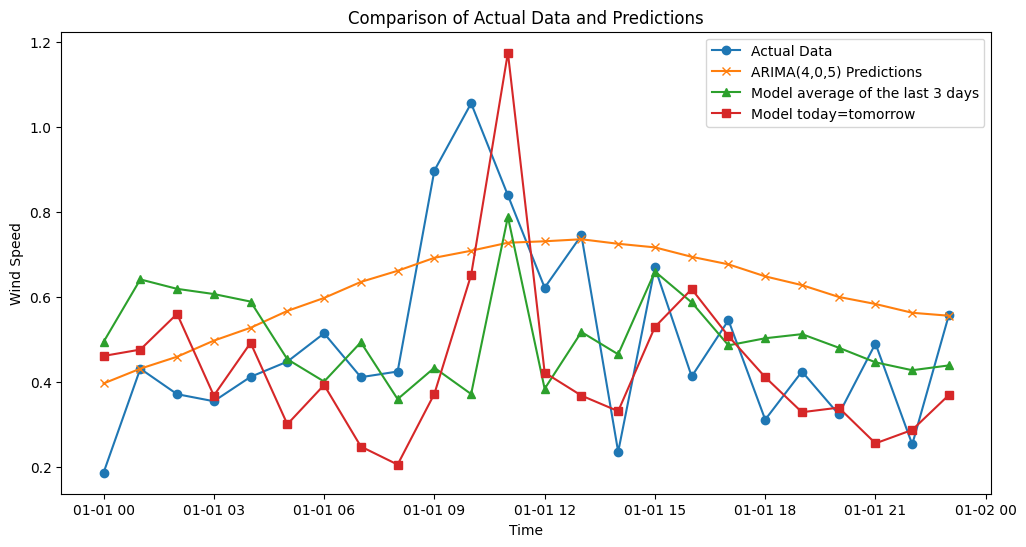

In [ ]:
# comparing the models with the actual data
# change p,d,q to the best found

comparison_wind_speed = pd.DataFrame({
    'Actual': actual_values_wind_speed_23,
    'ARIMA(4,0,5)': forecast_values_405,
    'Model average of the last 3 days': last_3_wind_speed,
    'Model today=tomorrow': today_is_tomorrow_wind_speed
})

print(comparison_wind_speed)

plt.figure(figsize=(12,6))

plt.plot(comparison_wind_speed.index, comparison_wind_speed['Actual'], label='Actual Data', marker='o')
plt.plot(comparison_wind_speed.index, comparison_wind_speed['ARIMA(4,0,5)'], label='ARIMA(4,0,5) Predictions', marker='x')
plt.plot(comparison_wind_speed.index, comparison_wind_speed['Model average of the last 3 days'], label='Model average of the last 3 days', marker='^')
plt.plot(comparison_wind_speed.index, comparison_wind_speed['Model today=tomorrow'], label='Model today=tomorrow', marker='s')

plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.title('Comparison of Actual Data and Predictions')
plt.legend()
plt.show()

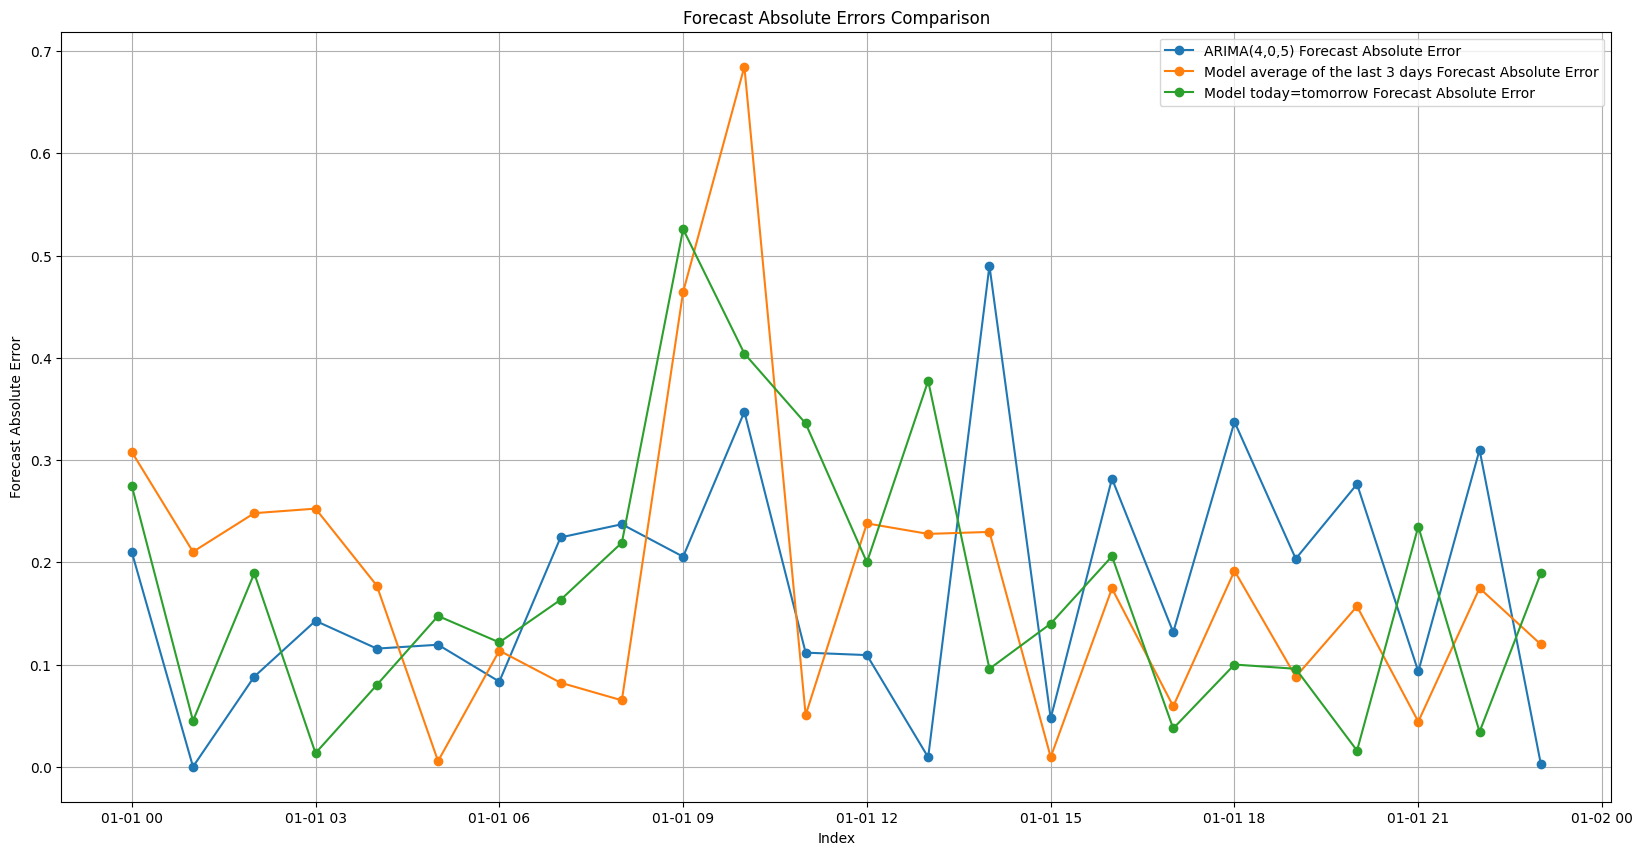

ARIMA(4,0,5) Forecast Absolute Error                        0.174091
Model average of the last 3 days Forecast Absolute Error    0.182338
Model today=tomorrow Forecast Absolute Error                0.176944
dtype: float64


In [ ]:
# 4 models' predictions compared to the actual data

# absolute errors of all the modela
forecast_absolute_errors = pd.DataFrame()
for column in comparison_wind_speed.columns:
    if column != 'Actual':
        forecast_absolute_errors[column + ' Forecast Absolute Error'] = (comparison_wind_speed['Actual'] - comparison_wind_speed[column]).abs()

# plot
plt.figure(figsize=(20, 10))
for column in forecast_absolute_errors.columns:
    plt.plot(forecast_absolute_errors[column], label=column, marker='o')

plt.xlabel('Index')
plt.ylabel('Forecast Absolute Error')
plt.title('Forecast Absolute Errors Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# values 
#print(forecast_absolute_errors)

# mean errors
print(forecast_absolute_errors.mean())
